In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchaudio
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from time import time
from torchvision import datasets
from torchvision import transforms

C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\torchaudio\backend\utils.py:66: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [3]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes[6]

'frog'

torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


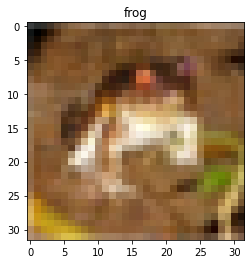

torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


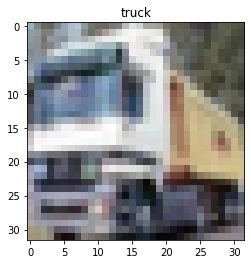

torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


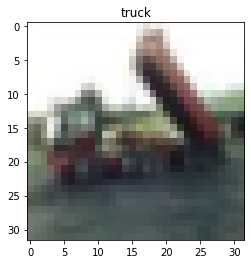

torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


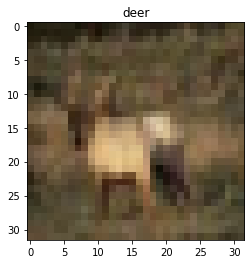

torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


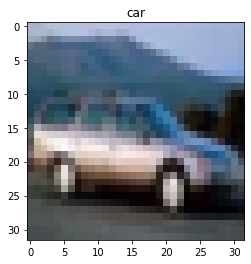

In [4]:
for i in range(5):
  x,y=trainset[i]
  print(x.shape,x.dtype,type(x))
  print(type(y))
  plt.imshow(x.permute(1,2,0))
  plt.title(classes[y])
  plt.show()

In [5]:
print(len(trainset))
print(len(testset))

50000
10000


In [6]:
train_loader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
test_loader=torch.utils.data.DataLoader(testset,batch_size=128,shuffle=True)

In [7]:
print(len(train_loader))
print(len(test_loader))

391
79


In [8]:
for x,y in train_loader:
  print(type(x),x.dtype,x.shape)
  print(type(y),y.dtype,y.shape)
  break

<class 'torch.Tensor'> torch.float32 torch.Size([128, 3, 32, 32])
<class 'torch.Tensor'> torch.int64 torch.Size([128])


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [10]:
from torch.nn.modules.activation import Softmax
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.flatten=nn.Flatten()
    self.Linear=nn.Sequential(
                      nn.Linear(3*32*32,1536),
                      nn.ReLU(),
                      nn.Linear(1536,768),
                      nn.ReLU(),
                      nn.Linear(768,384),
                      nn.ReLU(),
                      nn.Linear(384,192),
                      nn.ReLU(),
                      nn.Linear(192,10))
                      
    
  def forward(self,x):
    x=x.to(device)
    x=self.flatten(x)
    x=self.Linear(x)
    return x
    
model=Network().to(device)
print(model)

Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear): Sequential(
    (0): Linear(in_features=3072, out_features=1536, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1536, out_features=768, bias=True)
    (3): ReLU()
    (4): Linear(in_features=768, out_features=384, bias=True)
    (5): ReLU()
    (6): Linear(in_features=384, out_features=192, bias=True)
    (7): ReLU()
    (8): Linear(in_features=192, out_features=10, bias=True)
  )
)


In [11]:
lr=0.3
loss1=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr)

In [12]:
def train(dataloader,model,loss_fn,optimizer):
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    pred=model(X)
    loss=loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
  loss=loss.item()
  print(f'loss:{loss:>5f}')
  

In [13]:
def test(dataloader,model,loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct=0,0
  with torch.no_grad():
      for batch,(X,y) in enumerate(dataloader):
          X,y=X.to(device),y.to(device)
          pred=model(X)
          test_loss+=loss_fn(pred,y).item()
          correct+=(pred.argmax(1)==y).sum().item()
      test_loss/=num_batches
      correct/=size
      print(f'test error-{test_loss:>5f} \n Accuracy-{correct*100:>3f}%')

In [14]:
epochs=10
for epoch in range(epochs):
  print(f'Epoch-{epoch}')
  train(train_loader,model,loss1,optimizer)
  test(test_loader,model,loss1)

Epoch-0
loss:1.959694
test error-2.023606 
 Accuracy-23.330000%
Epoch-1
loss:1.997372
test error-1.946594 
 Accuracy-28.780000%
Epoch-2
loss:1.550072
test error-1.731328 
 Accuracy-37.900000%
Epoch-3
loss:1.663699
test error-1.745069 
 Accuracy-38.040000%
Epoch-4
loss:1.546809
test error-1.645959 
 Accuracy-39.060000%
Epoch-5
loss:1.663581
test error-1.681054 
 Accuracy-40.520000%
Epoch-6
loss:1.708400
test error-1.567825 
 Accuracy-45.060000%
Epoch-7
loss:1.654865
test error-1.694461 
 Accuracy-40.980000%
Epoch-8
loss:1.474308
test error-1.625234 
 Accuracy-40.290000%
Epoch-9
loss:1.330764
test error-1.505652 
 Accuracy-46.610000%


In [25]:
test(test_loader,model,loss1)

test error-1.501449 
 Accuracy-46.610000%


real value is  deer
predicted is car


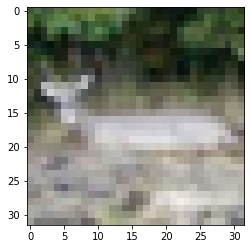

real value is  horse
predicted is horse


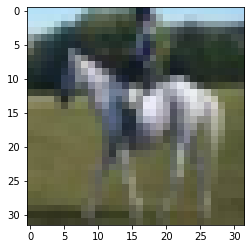

real value is  plane
predicted is plane


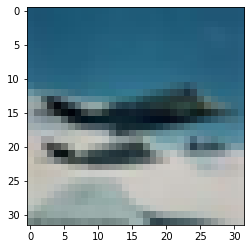

real value is  ship
predicted is ship


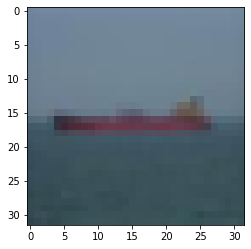

real value is  truck
predicted is car


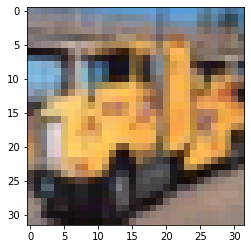

real value is  horse
predicted is frog


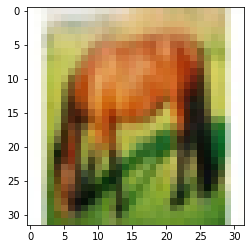

real value is  bird
predicted is horse


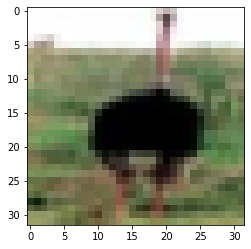

real value is  plane
predicted is plane


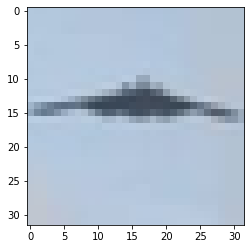

real value is  plane
predicted is plane


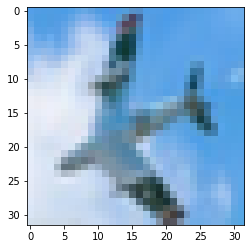

real value is  plane
predicted is plane


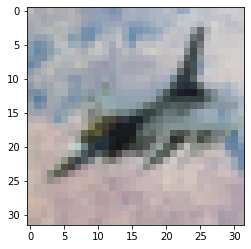

real value is  horse
predicted is dog


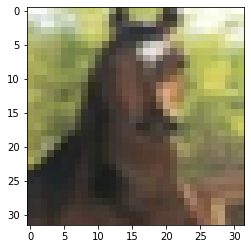

real value is  dog
predicted is cat


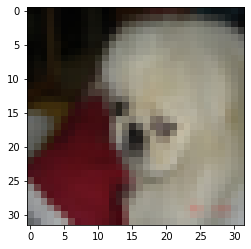

real value is  plane
predicted is plane


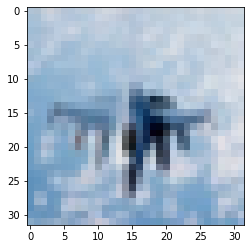

real value is  bird
predicted is dog


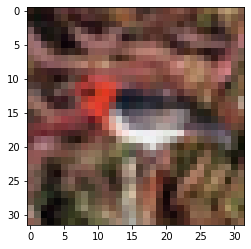

real value is  bird
predicted is bird


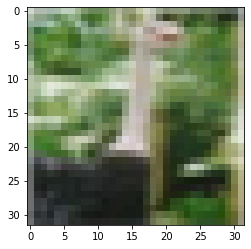

real value is  deer
predicted is ship


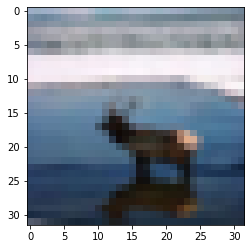

real value is  car
predicted is horse


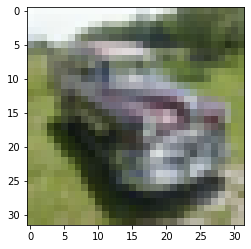

real value is  horse
predicted is horse


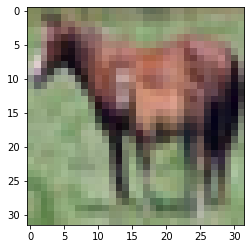

real value is  bird
predicted is bird


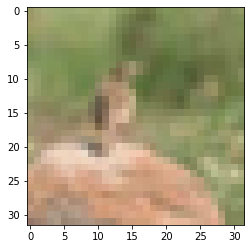

real value is  dog
predicted is frog


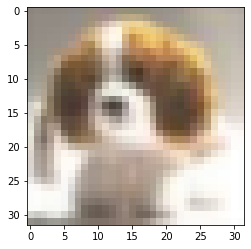

real value is  truck
predicted is truck


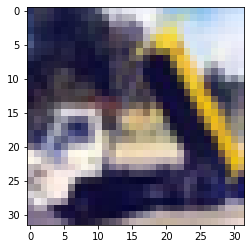

In [16]:
model.eval()
flat=nn.Flatten()
test_loader1=torch.utils.data.DataLoader(testset,batch_size=None,shuffle=True)
count=0
for pred_x,pred_y in test_loader1:
  if count>20:
    break
  print('real value is ',classes[pred_y])
  with torch.no_grad():
    pred=model(pred_x.view(1,3072))
    predicted=pred.argmax(1)
    print('predicted is',classes[predicted])
    count+=1
  plt.imshow(pred_x.permute(1,2,0).squeeze(2))
  plt.show()
    
